In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the dataset
data = pd.read_csv('default_plus_chromatic_features_1059_tracks_new.csv', header=None)
labels_df = data.iloc[:,-1] # splitting the class column, this is used for evaluation of the model
data = data.iloc[:,:-1]

k = list(range(len(np.unique(labels_df)))) # this k is used for plotting
classes = len(np.unique(labels_df)) # getting the no.of classes, this is not used in training the model

# Converting string labels to numbers.
lb = LabelEncoder()
labels = lb.fit_transform(labels_df)

# Creating test data variables (First 40 rows)
test_data = data[:40]
test_labels = labels[:40]

# Removing the test data from the training data.
data = data[40:]
labels = labels[40:]

# List for sse and rand scores.
sse=[]
rand=[]
t_rand=[]

In [3]:
# We fit the model here.
# Note: K-means in sklearn uses euclidean distance as the default distance metric

for i in range(1,classes+1):
    k_means = KMeans(init='random',n_clusters= i,max_iter=200)
    k_means.fit(data)
    pred = k_means.predict(test_data)
    sse.append(k_means.inertia_)
    rand.append(metrics.adjusted_rand_score(labels,k_means.labels_))
    t_rand.append(metrics.adjusted_rand_score(test_labels,pred))
    print("For K={1}\n SSE: {0}, \n Rand: {2}. \n".format(k_means.inertia_,i,metrics.adjusted_rand_score(labels,k_means.labels_))) 
    print(" Rand score on test data for k={1}: {0}. \n".format(metrics.adjusted_rand_score(test_labels,pred),i))

For K=1
 SSE: 117895.54684468414, 
 Rand: 0.0. 

 Rand score on test data for k=1: 0.0. 

For K=2
 SSE: 88209.79304958913, 
 Rand: 0.0018688776254887252. 

 Rand score on test data for k=2: 0.02128382203102004. 

For K=3
 SSE: 80294.70347458939, 
 Rand: 0.011826552824168784. 

 Rand score on test data for k=3: 0.14034037031491742. 

For K=4
 SSE: 73871.72183591704, 
 Rand: 0.015162485397978778. 

 Rand score on test data for k=4: 0.10548651106395876. 

For K=5
 SSE: 70623.44685629697, 
 Rand: 0.017045605756982975. 

 Rand score on test data for k=5: 0.09942950285248572. 

For K=6
 SSE: 67539.04359860698, 
 Rand: 0.026139378244425998. 

 Rand score on test data for k=6: 0.09307347322961076. 

For K=7
 SSE: 65559.90117881964, 
 Rand: 0.032686749971021056. 

 Rand score on test data for k=7: 0.136352899492146. 

For K=8
 SSE: 64115.304674028535, 
 Rand: 0.03297853566579518. 

 Rand score on test data for k=8: 0.1380128756638087. 

For K=9
 SSE: 62739.49413002047, 
 Rand: 0.034694599322403

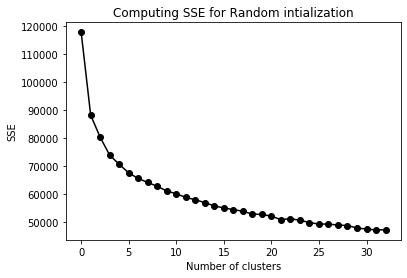

In [4]:
plt.plot(k, sse , 'o-', color='black',label="SSE")
plt.title("Computing SSE for Random intialization")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
# plt.savefig("SSE_for_Random_initialization.png")
plt.show()

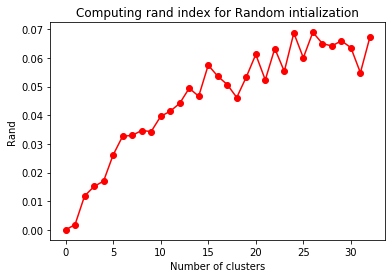

In [5]:
plt.plot(k, rand , 'o-r', label="rand")
plt.title("Computing rand index for Random intialization")
plt.xlabel("Number of clusters")
plt.ylabel("Rand")
# plt.savefig("RandScore_for_Random_initialization.png")
plt.show()

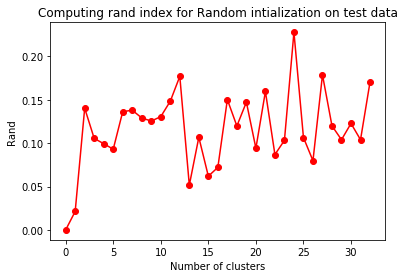

In [6]:
plt.plot(k, t_rand , 'o-r', label="rand")
plt.title("Computing rand index for Random intialization on test data")
plt.xlabel("Number of clusters")
plt.ylabel("Rand")
# plt.savefig("RandScore_for_Random_initialization_on_TestData.png")
plt.show()